# 다중회귀

### 연비예측

In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [47]:
data = pd.read_csv('/content/auto-mpg.csv', na_values=['?','*',''])   # ?값을 Nan으로 변환해주기
data.shape

(398, 9)

In [48]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [50]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [51]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [52]:
data = data.dropna()
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [53]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [54]:
data.drop(['car name'], axis=1, inplace=True)

In [55]:
X = data.iloc[:,1:]

In [56]:
y = data.iloc[:,0]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2022)
X_train.shape, X_test.shape

((313, 7), (79, 7))

In [58]:
# 스케일링

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)  # X 데이터 ndarray형태로 변환됨 -> y데이터도 ndarray로 만들기

In [59]:
y_train = y_train.values
y_test = y_test.values

In [60]:
X_train[:5]

array([[ 0.25201747,  0.30884377, -0.03238663,  0.48295238,  0.53806481,
         0.28121724, -0.6967138 ],
       [-0.91659689, -0.97613523, -1.13824274, -1.15838271,  0.57542379,
         0.28121724, -0.6967138 ],
       [ 1.42063183,  1.014133  ,  1.15245921,  1.04081518, -1.10573035,
        -1.08556841, -0.6967138 ],
       [ 0.25201747,  0.00933739, -0.55898478,  0.05888109,  0.46334685,
         0.55457437, -0.6967138 ],
       [ 0.25201747,  0.4924122 ,  0.09926291,  0.74575713,  0.27655195,
         0.00786011, -0.6967138 ]])

In [61]:
y_train[:5]

array([20.5, 30.5, 15. , 20.8, 18.5])

### 모델


In [62]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, input_shape = (7,), activation = 'relu'),   # input_shape = input_dim = 컬럼 개수(튜플형태로 입력) / 입력층
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1)   # 최종 출력은 1개, activation은 출력값을 그대로 출력해야되기 때문에 생략 / 출력층
])

In [63]:
model.summary()
# 512 : 7(input) x 64(unit) + 64(bias)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [64]:
EPOCHS = 1000

model.compile(optimizer='adam',
              loss = 'mse',
              metrics = ['mae', 'mse'])

In [65]:
history = model.fit(X_train,y_train,
          epochs = EPOCHS,
          validation_split=0.2)   # 데이터에서 0.2를 떼서 val데이터를 만들어 줌

# val 결과가 좋아야 좋은 모델

Epoch 1/1000
8/8 [==============================] - 1s 25ms/step - loss: 556.5601 - mae: 22.3548 - mse: 556.5601 - val_loss: 612.8027 - val_mae: 23.5533 - val_mse: 612.8027
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 534.3264 - mae: 21.8215 - mse: 534.3264 - val_loss: 589.6862 - val_mae: 23.0413 - val_mse: 589.6862
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 511.4588 - mae: 21.2584 - mse: 511.4588 - val_loss: 563.8957 - val_mae: 22.4680 - val_mse: 563.8957
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 485.3377 - mae: 20.6125 - mse: 485.3377 - val_loss: 533.4020 - val_mae: 21.7923 - val_mse: 533.4020
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 455.4686 - mae: 19.8629 - mse: 455.4686 - val_loss: 496.6659 - val_mae: 20.9644 - val_mse: 496.6659
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 419.7975 - mae: 18.9583 - mse: 419.7975 - val_loss: 452.5733 - val_

In [66]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

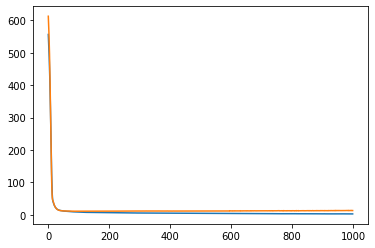

In [67]:
plt.plot(range(EPOCHS), history.history['loss'])
plt.plot(range(EPOCHS), history.history['val_loss'])
plt.show()

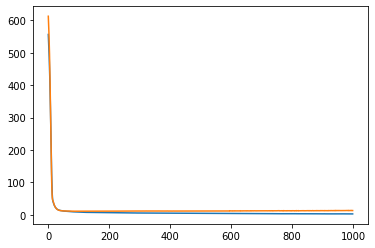

In [68]:
plt.plot(range(EPOCHS), history.history['mse'])
plt.plot(range(EPOCHS), history.history['val_mse'])
plt.show()

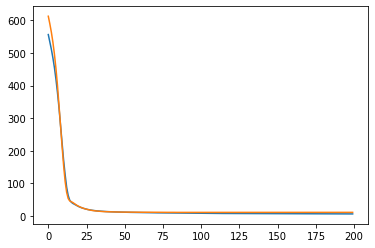

In [69]:
plt.plot(range(200), history.history['loss'][:200])
plt.plot(range(200), history.history['val_loss'][:200])
plt.show()

In [70]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 9.6949 - mae: 2.3842 - mse: 9.6949


[9.694876670837402, 2.384248733520508, 9.694876670837402]